In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import h5py

import sys
sys.path.append('../../')

from evaluation import *

np.random.seed(5)

/home/aryzhikov/.conda/envs/lasagne2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from sklearn.mixture import GaussianMixture
# pip install ard-em
from ard_em import GaussianMixtureARD

In [3]:
import pandas as pd
#! wget -o  ../../datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
column_names = 'label, lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb'.split(', ')
data = pd.read_csv('../../datasets/HIGGS.csv.gz', header=None, names=column_names)

In [4]:
data.head()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [5]:
X_data = data.drop('label', 1)
X_data = StandardScaler().fit_transform(X_data)

labels = data["label"]

In [6]:
from sklearn.model_selection import train_test_split
indx_train, indx_test = train_test_split(np.arange(len(labels), dtype='int32'), stratify=labels, train_size=0.1, test_size=0.1, random_state = 5)

In [7]:
y_train = labels[indx_train]
y_test = labels[indx_test]

X_train = X_data[indx_train]
X_test = X_data[indx_test]

In [8]:
X_good = X_train[np.where(y_train==0)[0]]

In [9]:
size = X_good.shape
noise = np.random.normal(0, 1e-4, size)*np.random.binomial(1, 0.2, size)

In [10]:
X_good.shape, X_train.shape, X_data.shape

((517088, 28), (1100000, 28), (11000000, 28))

In [11]:
noise

array([[ 4.41227487e-05, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  5.91442432e-06, -0.00000000e+00],
       [ 3.28884293e-07, -0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00, -5.77513233e-05,  0.00000000e+00],
       [-1.07163985e-05,  2.26010677e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -1.15337775e-04,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  1.52873263e-04, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00, -2.36668406e-04]])

In [12]:
gm = GaussianMixture(n_components=15, n_init=6, verbose=2)
# gm = GaussianMixtureARD(n_init=6, verbose=2)

In [13]:
gm.fit(X_good+noise)

Initialization 0
  Iteration 0	 time lapse 16.08779s	 ll change inf
  Iteration 10	 time lapse 32.68041s	 ll change 0.08515
  Iteration 20	 time lapse 31.91372s	 ll change 0.01924
  Iteration 30	 time lapse 32.02058s	 ll change 0.00294
Initialization converged: True	 time lapse 119.16419s	 ll -21.29098
Initialization 1
  Iteration 0	 time lapse 20.32396s	 ll change inf
  Iteration 10	 time lapse 31.70384s	 ll change 0.37634
  Iteration 20	 time lapse 31.59929s	 ll change 0.00158
Initialization converged: True	 time lapse 86.80669s	 ll -19.09130
Initialization 2
  Iteration 0	 time lapse 31.47978s	 ll change inf
  Iteration 10	 time lapse 30.92428s	 ll change 0.02594
  Iteration 20	 time lapse 31.27483s	 ll change 0.02488
  Iteration 30	 time lapse 31.11832s	 ll change 0.00516
  Iteration 40	 time lapse 30.91130s	 ll change 0.00587
Initialization converged: True	 time lapse 177.95114s	 ll -19.58115
Initialization 3
  Iteration 0	 time lapse 15.26285s	 ll change inf
  Iteration 10	 time 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=15, n_init=6, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=2,
        verbose_interval=10, warm_start=False, weights_init=None)

In [18]:
gm.n_components

15

In [14]:
from scipy.stats import multivariate_normal

In [15]:
n_samples = X_good.shape[0]

In [16]:
gen = np.array(multivariate_normal.rvs(mean=gm.means_[0], cov=gm.covariances_[0], size=int(gm.weights_[0]*n_samples)))
for d in range(1,gm.n_components):
    gen=np.vstack((gen,multivariate_normal.rvs(mean=gm.means_[d], cov=gm.covariances_[d], size=int(gm.weights_[d]*n_samples))))
np.random.shuffle(gen)
gen = np.array(gen)

In [17]:
probabilities = np.empty((gm.n_components, gen.shape[0]))

In [18]:
for d in range(gm.n_components):
    probabilities[d] = multivariate_normal.pdf(gen, mean=gm.means_[d], 
                                                    cov=gm.covariances_[d], allow_singular=True)

In [19]:
gen.shape

(517082, 28)

In [20]:
maxprob = np.max(probabilities, axis = 0)
gen_w = 1./(maxprob+1e-2)

In [21]:
#indices = gen_w.argsort()[-50:][::-1] #_toobig
#indices_toosmall = gen_w.argsort()[:200][::-1]

#indices = np.concatenate((indices_toosmall,indices_toobig))

In [22]:
#gen_w = np.delete(gen_w, indices)
#gen = np.delete(gen, indices, axis = 0)

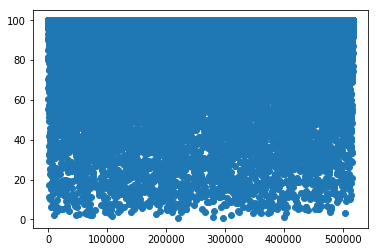

In [23]:
plt.scatter(np.arange(len(gen_w)), gen_w)
plt.show()

In [24]:
weights = np.ones((n_samples,1)) #X_train.shape[0]

In [25]:
gen_w_normed = gen_w/np.sum(gen_w)*np.sum(weights)

In [26]:
gen_w_normed.sum(), np.sum(weights)

(517087.99999999994, 517088.0)

In [27]:
y1 = np.zeros((n_samples,1))
y2 = np.ones((gen.shape[0],1))

In [28]:
X_mix = np.vstack((X_good, gen)) #X_good

y_mix = np.vstack((y1, y2)) #y_train

weights_mix = np.vstack((weights.reshape(-1,1), gen_w_normed.reshape(-1,1))).reshape(-1)

In [29]:
weights_mix.shape

(1034170,)

In [30]:
import tensorflow as tf

s = tf.InteractiveSession()

import keras
from keras.models import Sequential
from keras import layers as L

Using TensorFlow backend.


In [31]:
net = Sequential()
net.add(L.Dense(64, input_shape=(X_data.shape[1],), activation = 'relu'))
#net.add(L.BatchNormalization())
#net.add(L.Dense(32, activation='relu'))
net.add(L.BatchNormalization())
net.add(L.Dropout(0.2))
net.add(L.Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.001)
net.compile(optimizer=adam, loss='binary_crossentropy')

In [32]:
history = net.fit(X_mix, y_mix, batch_size=256, epochs=120, validation_split = 0.1, verbose=1, shuffle=True, sample_weight=weights_mix)

Train on 930753 samples, validate on 103417 samples
Epoch 1/120
930753/930753 [==============================] - 10s 10us/step - loss: 0.6106 - val_loss: 0.5666
Epoch 2/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.5037 - val_loss: 0.5112
Epoch 3/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.4843 - val_loss: 0.4850
Epoch 4/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.4678 - val_loss: 0.4651
Epoch 5/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.4483 - val_loss: 0.4451
Epoch 6/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.4463 - val_loss: 0.4365
Epoch 7/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.4438 - val_loss: 0.4237
Epoch 8/120
930753/930753 [==============================] - 9s 10us/step - loss: 0.4428 - val_loss: 0.4728
Epoch 9/120
930753/930753 [==============================] - 9s 10us/step - loss: 0

KeyboardInterrupt: 

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [34]:
y_pred = net.predict(X_test, verbose=1)

1100000/1100000 [==============================] - 18s 16us/step


In [35]:
y_pred.shape, y_test.shape

((1100000, 1), (1100000,))

('f1_score ', 0.12271179869885998)
confusion_matrix 
[[480172  36916]
 [542396  40516]]


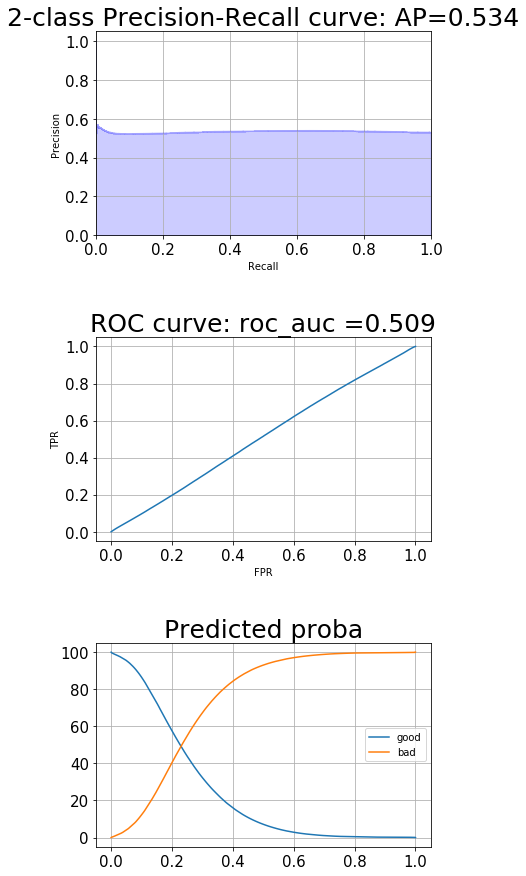

In [37]:
perfomance(y_test.squeeze(), y_pred)